In [3]:

pip install tensorflow

     |████████████████████████████████| 217.4 MB 9.4 kB/s eta 0:00:01    |███▋                            | 24.5 MB 4.6 MB/s eta 0:00:42     |████                            | 27.2 MB 5.7 MB/s eta 0:00:34     |█████                           | 33.7 MB 4.6 MB/s eta 0:00:40     |█████████                       | 60.5 MB 5.0 MB/s eta 0:00:32     |██████████                      | 68.2 MB 4.7 MB/s eta 0:00:32     |███████████████▎                | 104.1 MB 4.9 MB/s eta 0:00:24     |██████████████████████████▌     | 179.8 MB 4.6 MB/s eta 0:00:09     |████████████████████████████▋   | 194.0 MB 5.2 MB/s eta 0:00:05     |█████████████████████████████▏  | 198.2 MB 4.0 MB/s eta 0:00:05
     |████████████████████████████████| 13.0 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 3.5 MB/s eta 0:00:011
     |████████████████████████████████| 65 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.3

In [13]:
import numpy as np
import pandas as pd
from keras.datasets import cifar10


In [14]:
data=pd.read_csv('/Users/deeptihegde/Downloads/machine_failure_data.csv')
data.head()

Date  Location  Min_Temp  Max_Temp  Leakage  Evaporation  \
0  2008-12-01         3      13.4      22.9      0.6          NaN   
1  2008-12-02         3       7.4      25.1      0.0          NaN   
2  2008-12-03         3      12.9      25.7      0.0          NaN   
3  2008-12-04         3       9.2      28.0      0.0          NaN   
4  2008-12-05         3      17.5      32.3      1.0          NaN   

   Electricity Parameter1_Dir  Parameter1_Speed Parameter2_9am  ...  \
0          NaN              W              44.0              W  ...   
1          NaN            WNW              44.0            NNW  ...   
2          NaN            WSW              46.0              W  ...   
3          NaN             NE              24.0             SE  ...   
4          NaN              W              41.0            ENE  ...   

  Parameter4_3pm  Parameter5_9am  Parameter5_3pm  Parameter6_9am  \
0           22.0          1007.7          1007.1             8.0   
1           25.0          1010.6          1007.8             NaN   
2           30.0          1007.6          1008.7             NaN   
3           16.0          1017.6          1012.8             NaN   
4           33.0          1010.8          1006.0             7.0   

   Parameter6_3pm  Parameter7_9am  Parameter7_3pm  Failure_today  RISK_MM  \
0             NaN            16.9            21.8             No      0.0   
1             NaN            17.2            24.3             No      0.0   
2             2.0            21.0            23.2             No      0.0   
3             NaN            18.1            26.5             No      1.0   
4             8.0            17.8            29.7             No      0.2   

   Fail_tomorrow  
0             No  
1             No  
2             No  
3             No  
4             No  

[5 rows x 24 columns]

In [15]:
type(data)

pandas.core.frame.DataFrame

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              142193 non-null  object 
 1   Location          142193 non-null  int64  
 2   Min_Temp          141556 non-null  float64
 3   Max_Temp          141871 non-null  float64
 4   Leakage           140787 non-null  float64
 5   Evaporation       81350 non-null   float64
 6   Electricity       74377 non-null   float64
 7   Parameter1_Dir    132863 non-null  object 
 8   Parameter1_Speed  132923 non-null  float64
 9   Parameter2_9am    132180 non-null  object 
 10  Parameter2_3pm    138415 non-null  object 
 11  Parameter3_9am    140845 non-null  float64
 12  Parameter3_3pm    139563 non-null  float64
 13  Parameter4_9am    140419 non-null  float64
 14  Parameter4_3pm    138583 non-null  float64
 15  Parameter5_9am    128179 non-null  float64
 16  Parameter5_3pm    12

In [17]:
sample = to_categorical(data, dtype ="uint8")

NameError: name 'to_categorical' is not defined

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

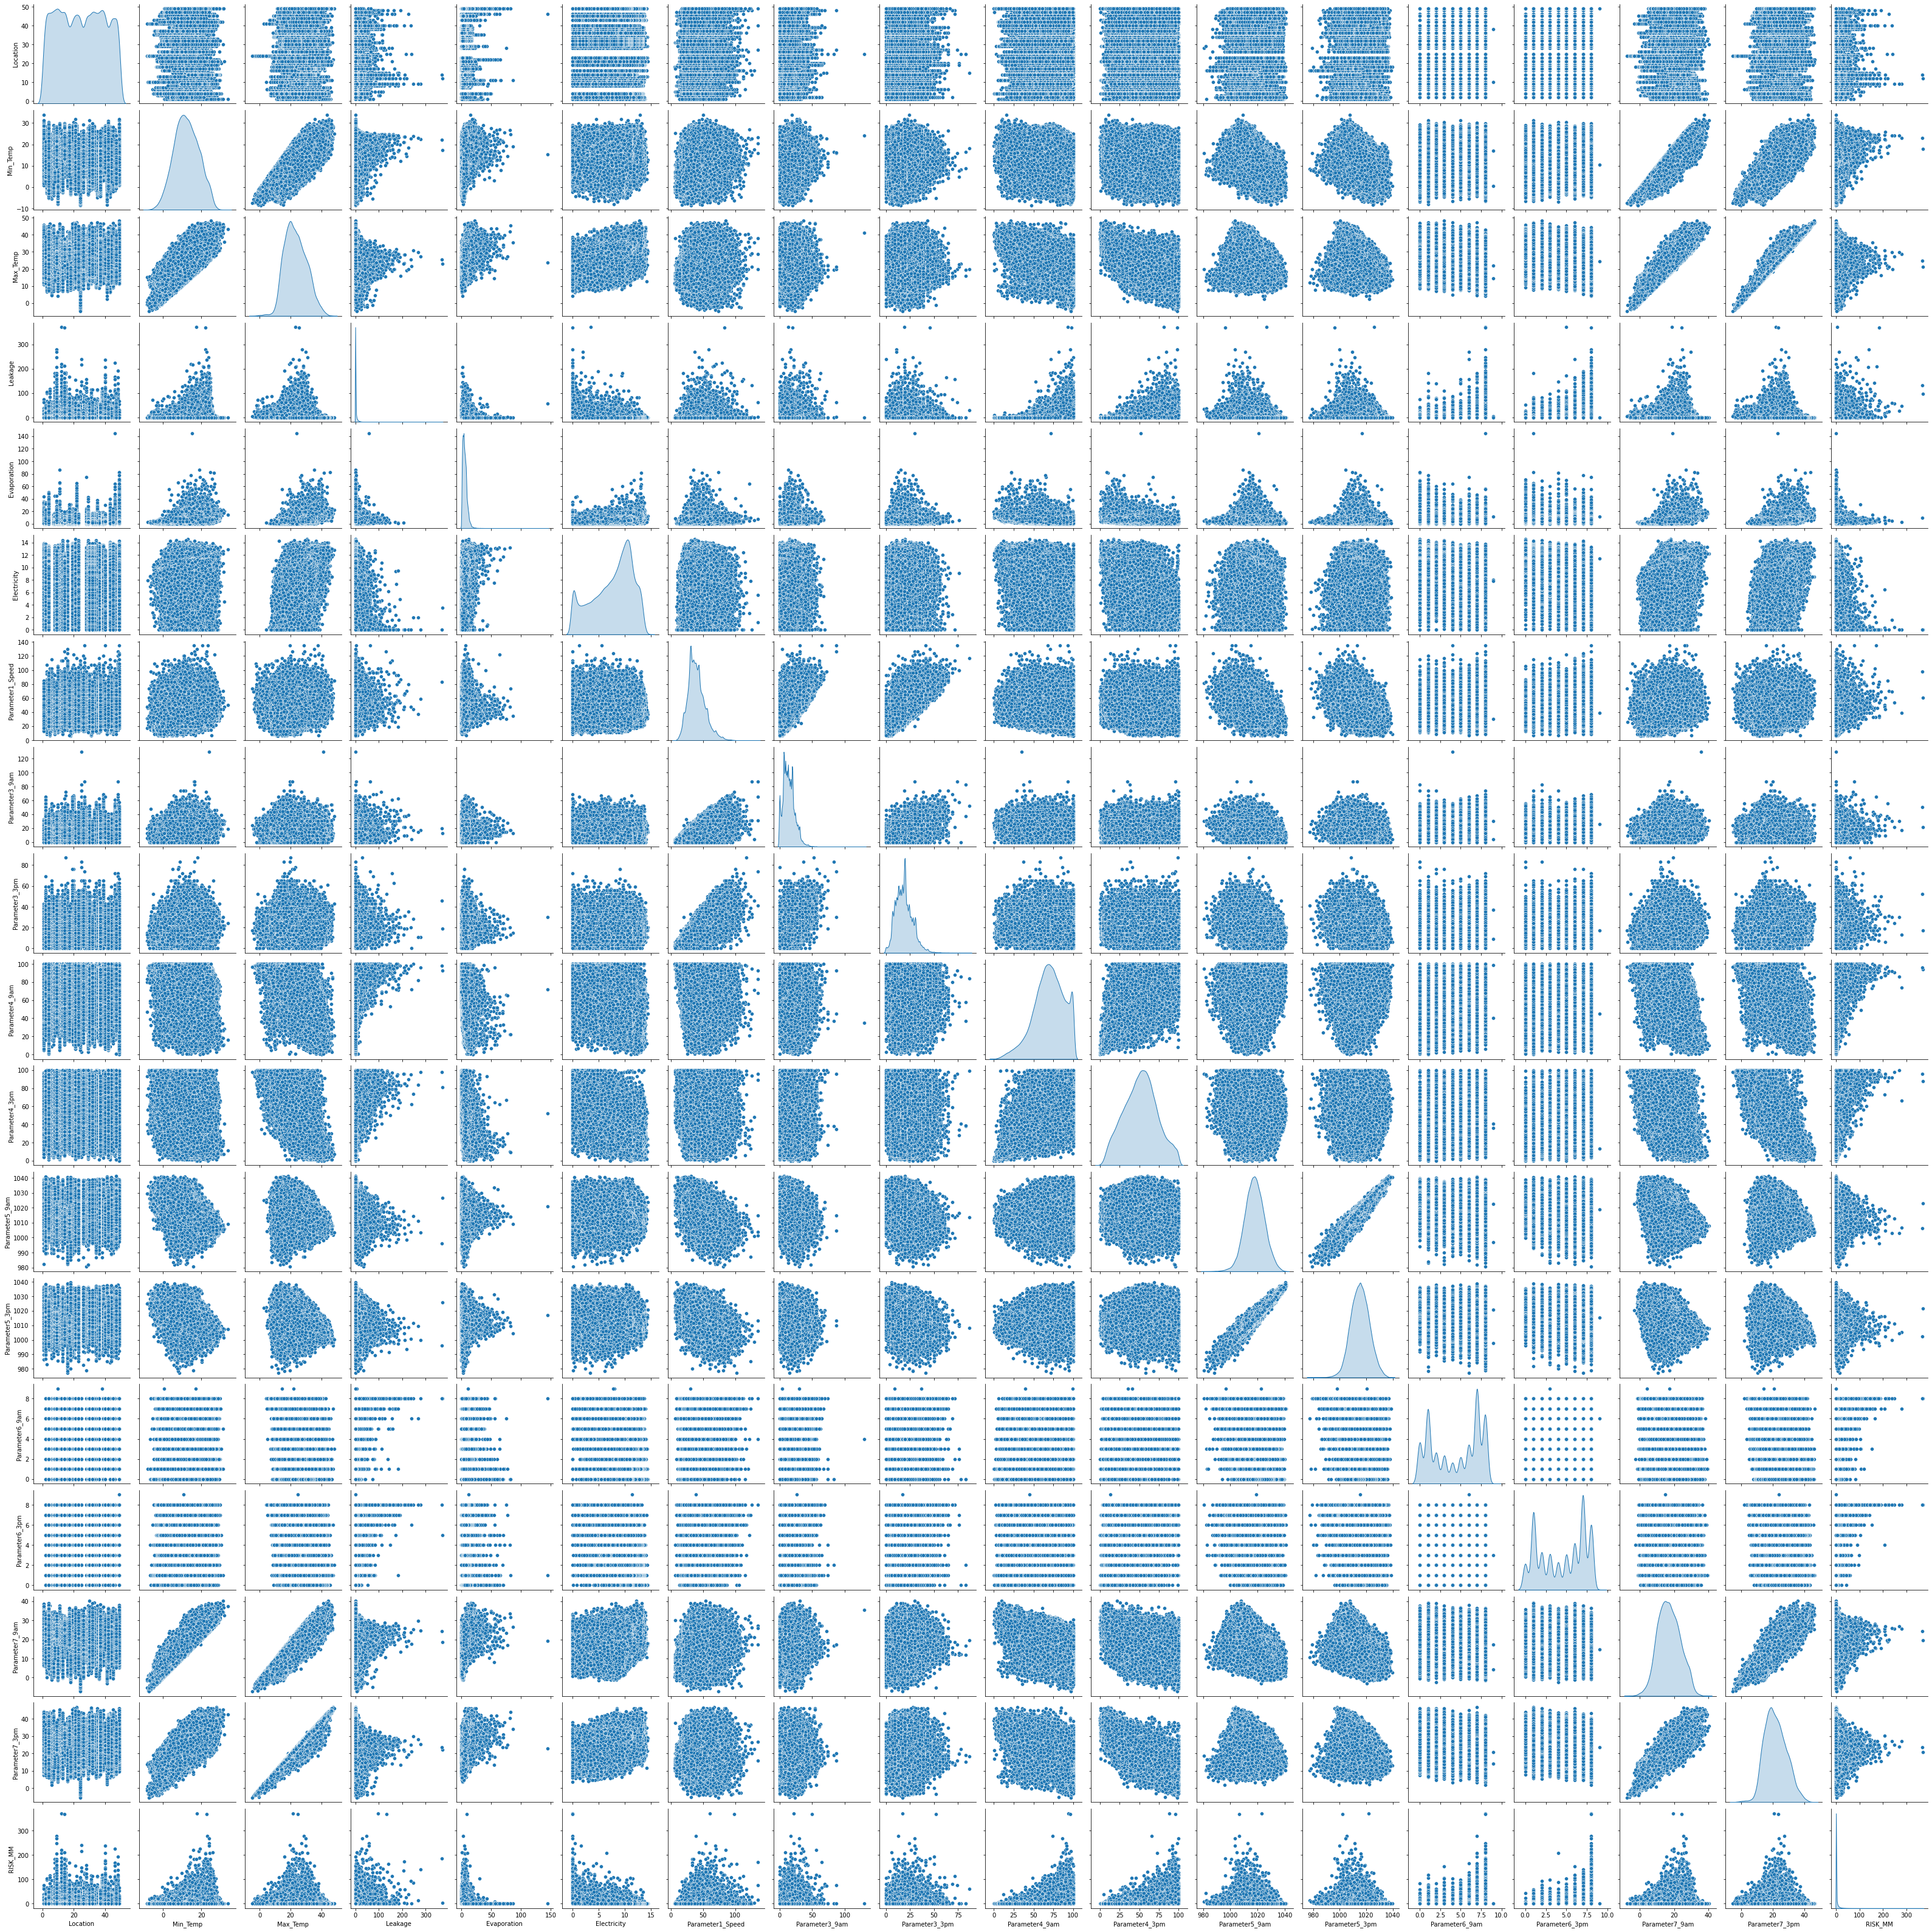

In [26]:
sns.pairplot( data , diag_kind='kde')

In [21]:
data.corr()

Location  Min_Temp  Max_Temp   Leakage  Evaporation  \
Location          1.000000 -0.006202 -0.020503 -0.003476     0.044027   
Min_Temp         -0.006202  1.000000  0.736267  0.104255     0.467261   
Max_Temp         -0.020503  0.736267  1.000000 -0.074839     0.588915   
Leakage          -0.003476  0.104255 -0.074839  1.000000    -0.064549   
Evaporation       0.044027  0.467261  0.588915 -0.064549     1.000000   
Electricity       0.003152  0.072961  0.469967 -0.227525     0.366607   
Parameter1_Speed  0.072039  0.177285  0.067690  0.133497     0.203001   
Parameter3_9am    0.077313  0.176005  0.014680  0.086816     0.193936   
Parameter3_3pm    0.064784  0.175749  0.050800  0.057759     0.128895   
Parameter4_9am   -0.002076 -0.234211 -0.505432  0.223725    -0.505890   
Parameter4_3pm    0.011195  0.005999 -0.509270  0.255312    -0.392785   
Parameter5_9am    0.037096 -0.451260 -0.332293 -0.168085    -0.269907   
Parameter5_3pm    0.047098 -0.461623 -0.427279 -0.126728    -0.293160   
Parameter6_9am   -0.014217  0.077625 -0.289865  0.198195    -0.185032   
Parameter6_3pm   -0.021069  0.020489 -0.279053  0.171993    -0.184287   
Parameter7_9am   -0.015619  0.901813  0.887020  0.011477     0.545497   
Parameter7_3pm   -0.022897  0.708865  0.984562 -0.079178     0.574275   
RISK_MM          -0.002788  0.124743 -0.044208  0.308557    -0.043498   

                  Electricity  Parameter1_Speed  Parameter3_9am  \
Location             0.003152          0.072039        0.077313   
Min_Temp             0.072961          0.177285        0.176005   
Max_Temp             0.469967          0.067690        0.014680   
Leakage             -0.227525          0.133497        0.086816   
Evaporation          0.366607          0.203001        0.193936   
Electricity          1.000000         -0.032831        0.008040   
Parameter1_Speed    -0.032831          1.000000        0.604837   
Parameter3_9am       0.008040          0.604837        1.000000   
Parameter3_3pm       0.056012          0.686419        0.519971   
Parameter4_9am      -0.491603         -0.215461       -0.270807   
Parameter4_3pm      -0.629122         -0.026663       -0.031607   
Parameter5_9am       0.040959         -0.457891       -0.227923   
Parameter5_3pm      -0.020464         -0.412922       -0.174916   
Parameter6_9am      -0.675610          0.071235        0.024280   
Parameter6_3pm      -0.704202          0.109088        0.053584   
Parameter7_9am       0.291139          0.150258        0.129298   
Parameter7_3pm       0.490180          0.032970        0.005108   
RISK_MM             -0.294973          0.162923        0.069404   

                  Parameter3_3pm  Parameter4_9am  Parameter4_3pm  \
Location                0.064784       -0.002076        0.011195   
Min_Temp                0.175749       -0.234211        0.005999   
Max_Temp                0.050800       -0.505432       -0.509270   
Leakage                 0.057759        0.223725        0.255312   
Evaporation             0.128895       -0.505890       -0.392785   
Electricity             0.056012       -0.491603       -0.629122   
Parameter1_Speed        0.686419       -0.215461       -0.026663   
Parameter3_9am          0.519971       -0.270807       -0.031607   
Parameter3_3pm          1.000000       -0.145942        0.015903   
Parameter4_9am         -0.145942        1.000000        0.667388   
Parameter4_3pm          0.015903        0.667388        1.000000   
Parameter5_9am         -0.295567        0.139519       -0.027449   
Parameter5_3pm         -0.254988        0.186955        0.051840   
Parameter6_9am          0.052780        0.452182        0.517037   
Parameter6_3pm          0.025269        0.358043        0.523270   
Parameter7_9am          0.163601       -0.472826       -0.221467   
Parameter7_3pm          0.028567       -0.499777       -0.557989   
RISK_MM                 0.049240        0.172417        0.313183   

                  Parameter5_9am  Parameter5_3pm  Parameter6_9a

<AxesSubplot:>

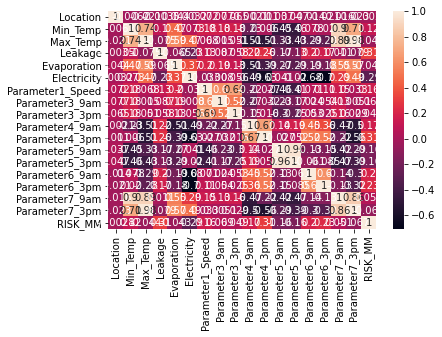

In [22]:
sns.heatmap( data.corr(), annot=True)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()

In [ ]:
x = data[['Parameter1_Speed']]

In [ ]:
type(x)

In [ ]:
y = data[['Parameter3_9am']]

In [ ]:
linreg.fit(x, y)

In [ ]:
a=linreg.coef_
b=linreg.intercept_

In [ ]:
Parameter1_Speed=1
Sales = b+ a*Parameter1_Speed 

In [ ]:
TV = 150
Sales = linreg.intercept_ + linreg.coef_*TV

In [ ]:
Sales

In [ ]:
newData = {'TV': [150, 200, 250]}
newData = pd.DataFrame(data=newData)

In [ ]:
linreg.predict(newData)

In [ ]:
model = linreg.fit(x, y)

In [ ]:
SalesPredictions = model.predict(x)

In [ ]:
SalesPredictions[0:5]

In [ ]:
y[0:5]

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_squared_error(SalesPredictions, y)

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(SalesPredictions, y))

In [ ]:
rmse

In [ ]:
avgSales = np.mean(y)

In [ ]:
avgSales

In [ ]:
rmse/avgSales*100

In [ ]:
model.score(x,y)

In [ ]:
0.782224*0.782224  ### Corr(TV, Sales) * Corr(TV, Sales)

In [ ]:
x = data[["Radio"]]
y = data[["Sales"]]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
model2 = LinearRegression()
model2.fit(x_train, y_train)

In [ ]:
 = data[["Radio"]]
y = data[["Sales"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
model2 = LinearRegression()
model2.fit(x_train, y_train)

In [ ]:
predictedSales = model2.predict(x_train)
mse = metrics.mean_squared_error(predictedSales, y_train)
trainRmse = np.sqrt(mse)
predictedSales = model2.predict(x_test)
mse = metrics.mean_squared_error(predictedSales, y_test)
testRmse = np.sqrt(mse)
print(testRmse)

In [ ]:
testRmse/np.mean(y_train)*100

In [ ]:
model2.coef_

In [ ]:
model2.score(x_train, y_train)

In [ ]:
model2.score(x_test, y_test)

In [ ]:
predictedSales = model2.predict(x_train)

In [ ]:
mse = metrics.mean_squared_error(predictedSales, y_train)

In [ ]:
rmse = np.sqrt(mse)
rmse 

In [ ]:
x = data[["TV", "Radio"]]

In [ ]:
x.head(2)

In [ ]:
x['TvRadio'] = x.TV*x.Radio

In [ ]:
x.head(2)

In [ ]:
y  = data[["Sales"]]

In [ ]:
model8 = LinearRegression()

In [ ]:
## Adjusted R^2
def AdjRsquare(modelToBeTested, indData, target):
    Rsquare = modelToBeTested.score(indData, target)
    NoData = len(target)
    p = indData.shape[1]
    tempRsquare = 1 - (1-Rsquare)*(NoData-1)/(NoData - p - 1)
    return tempRsquare

In [ ]:
AdjRsquare(model2, x_test, y_test)

In [ ]:
model2.score(x_test, y_test)

In [ ]:
x_test.shape

In [ ]:
seed = 7

In [ ]:
## Combine all the steps to test the model performance
def linRegcheckModelPerformance(x, y):
    model = LinearRegression()
    # Covert data into train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                        random_state = seed)
    # Build model with train data set
    model.fit(x_train, y_train)
    # Train accuracies
    trainR2 = model.score(x_train, y_train)
    predictedSales = model.predict(x_train)
    mse = metrics.mean_squared_error(predictedSales, y_train)
    trainRmse = np.sqrt(mse)
    trainRmsePct = trainRmse/np.mean(np.mean(np.array(y_train)))*100
    trainAdjR2 = AdjRsquare(model, x_train, y_train)
    trainAccuracies = [len(y_train), trainRmse, trainRmsePct, trainR2, trainAdjR2]
    # Test accuracies
    testR2 = model.score(x_test, y_test)
    predictedSales = model.predict(x_test)
    mse = metrics.mean_squared_error(predictedSales, y_test)
    testRmse = np.sqrt(mse)
    testRmsePct = testRmse/np.mean(np.mean(np.array(y_test)))*100
    testAdjR2 = AdjRsquare(model, x_test, y_test)
    testAccuracies = [len(y_test), testRmse, testRmsePct, testR2, testAdjR2]
    # Create dataframe for results
    resultsDf = pd.DataFrame(index = ["dataSize", "rmse", "rmsePct", "r2", "adjR2"])
    resultsDf['trainData'] = trainAccuracies
    resultsDf['testData'] = testAccuracies
    return ( round(resultsDf, 4))

In [ ]:
# Model 4
x = data[["TV", "Radio"]]
y = data[["Sales"]]
linRegcheckModelPerformance(x, y)

In [ ]:
# Model 5
x = data[["Radio", "Newspaper"]]
y = data[["Sales"]]
linRegcheckModelPerformance(x, y)

In [ ]:
# Model 7
x = data[["TV", "Radio", "Newspaper"]]
y = data[["Sales"]]
linRegcheckModelPerformance(x, y)

In [ ]:
data["TvRadio"] = data["TV"]*data["Radio"]

In [ ]:
data.head(2)

In [ ]:
x = data[["TV", "Radio", "TvRadio"]]
y = data[["Sales"]]
linRegcheckModelPerformance(x, y)